In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data = pd.read_csv(r"C:\Users\HAI\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv")
df = pd.DataFrame(data)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
#Check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


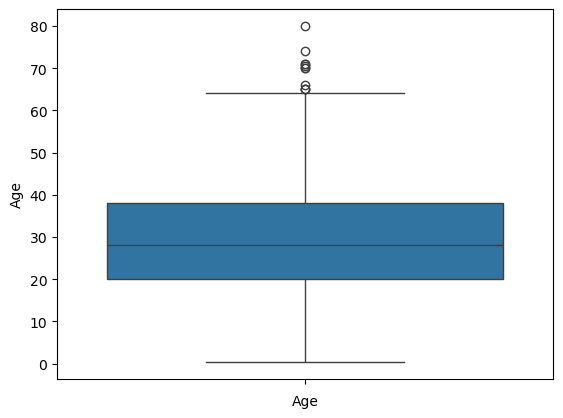

In [67]:
#check for the outliers using the boxplot
sns.boxplot(df['Age'])
plt.xlabel('Age')
plt.show()

In [68]:
#Above Diagram outliers are present we can used the Median
numaric = pd.to_numeric(df['Age'],errors = 'coerce')
df['Age'] = df['Age'].fillna(df['Age'].median())

In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
#if catagorical column missing the values we can fill the mode only 
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [71]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [72]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


In [73]:
df.drop('Name',inplace = True,axis = 1)

In [74]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S


In [75]:
df.drop(['Ticket','Cabin'],inplace = True,axis = 1)

In [76]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [77]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [78]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})

In [79]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [80]:
df[['Age','Fare']] = df[['Age','Fare']].astype(int)

In [81]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7,S
1,2,1,1,0,38,1,0,71,C
2,3,1,3,0,26,0,0,7,S
3,4,1,1,0,35,1,0,53,S
4,5,0,3,1,35,0,0,8,S


In [82]:
df['Pclass'].unique()

array([3, 1, 2])

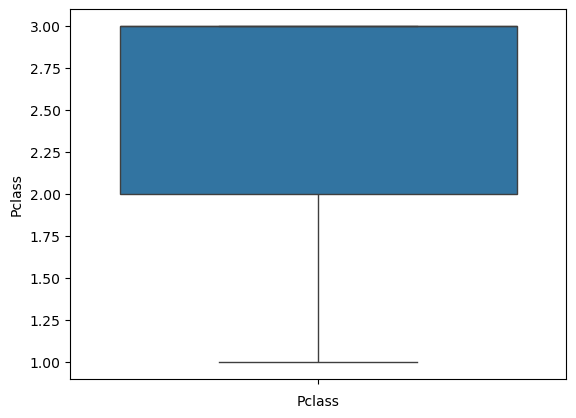

In [83]:
sns.boxplot(df['Pclass'])
plt.xlabel('Pclass')
plt.show()

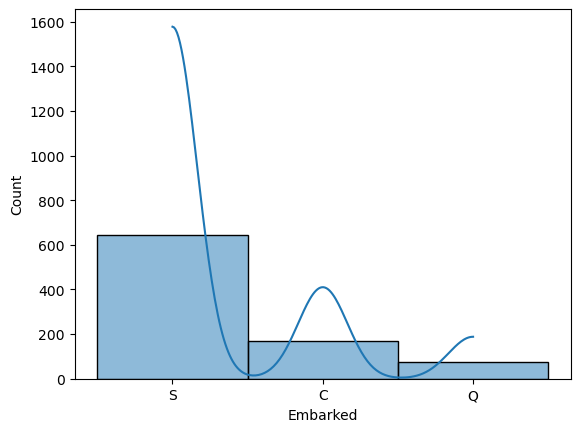

In [84]:
sns.histplot(df['Embarked'],kde = True)
plt.show()

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
sds = StandardScaler()

In [87]:
df['Pclass'] = sds.fit_transform(df[['Pclass']]).astype(int)

In [88]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,0,1,22,1,0,7,S
1,2,1,-1,0,38,1,0,71,C
2,3,1,0,0,26,0,0,7,S
3,4,1,-1,0,35,1,0,53,S
4,5,0,0,1,35,0,0,8,S


In [89]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

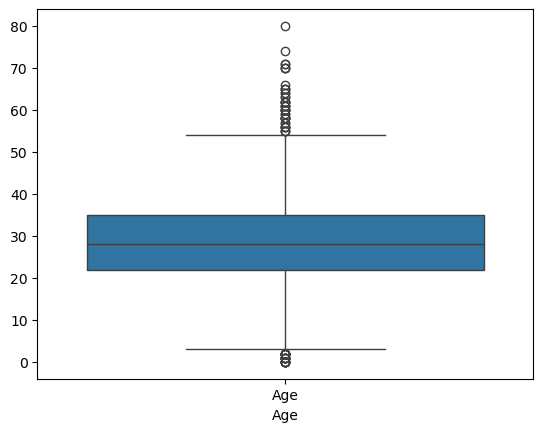

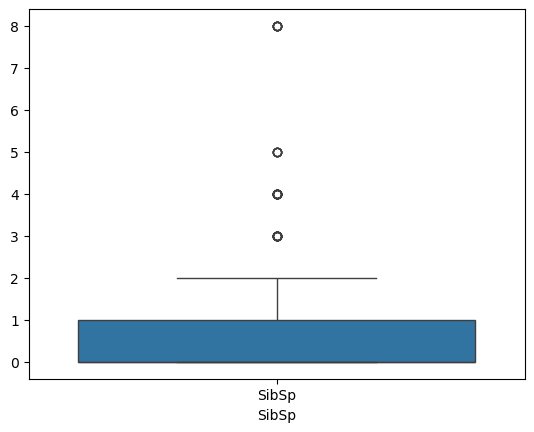

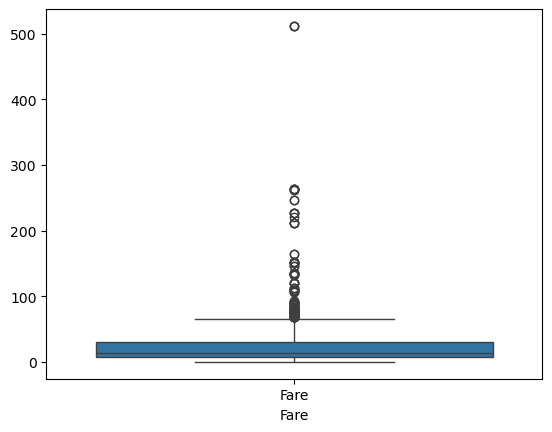

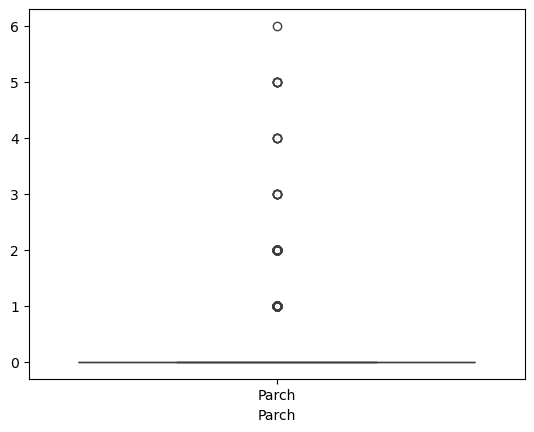

In [90]:
column = df[['Age','SibSp','Fare','Parch']]
for col in column:
    sns.boxplot(df[[col]])
    plt.xlabel(col)
    plt.show()

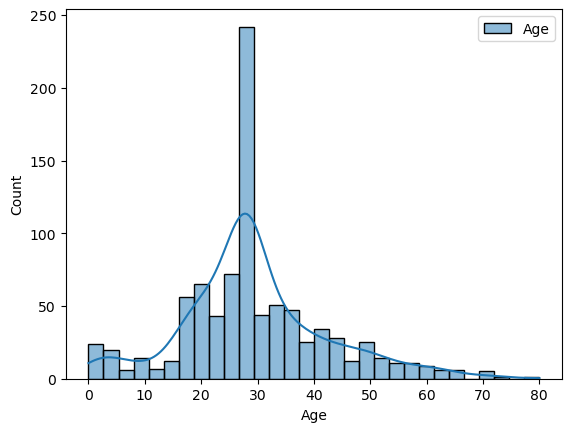

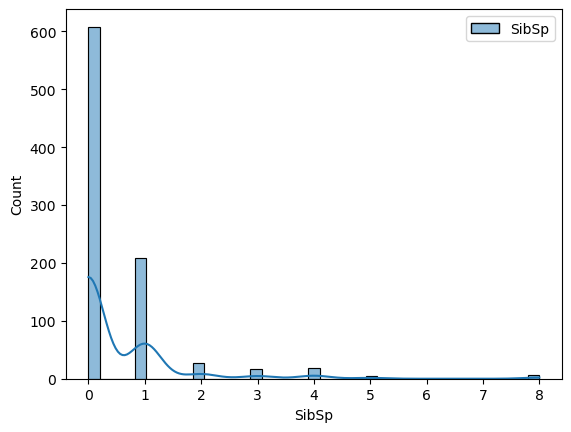

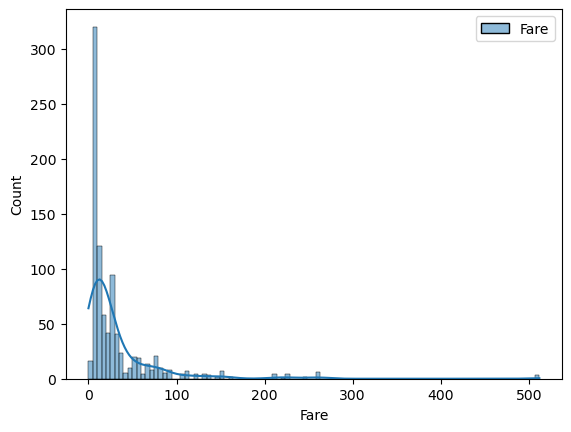

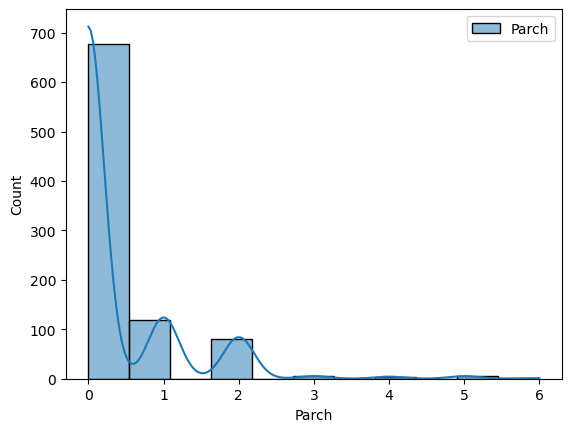

In [91]:
column = df[['Age','SibSp','Fare','Parch']]
for col in column:
    sns.histplot(df[[col]],kde = True)
    plt.xlabel(col)
    plt.show()

In [92]:
column = df[['Age','SibSp','Fare','Parch']]
for col in column:
    print(col,df[col].skew())

Age 0.5035697085944845
SibSp 3.6953517271630565
Fare 4.786429747056348
Parch 2.7491170471010933


In [93]:
from sklearn.preprocessing import RobustScaler

In [94]:
rs = RobustScaler()

In [95]:
df[['Age','SibSp','Fare','Parch']] = rs.fit_transform(df[['Age','SibSp','Fare','Parch']])

In [96]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,0,1,-0.461538,1.0,0.0,-0.291667,S
1,2,1,-1,0,0.769231,1.0,0.0,2.375000,C
2,3,1,0,0,-0.153846,0.0,0.0,-0.291667,S
3,4,1,-1,0,0.538462,1.0,0.0,1.625000,S
4,5,0,0,1,0.538462,0.0,0.0,-0.250000,S
5,6,0,0,1,0.000000,0.0,0.0,-0.250000,Q
6,7,0,-1,1,2.000000,0.0,0.0,1.541667,S
7,8,0,0,1,-2.000000,3.0,1.0,0.291667,S
8,9,1,0,0,-0.076923,0.0,2.0,-0.125000,S
9,10,1,0,0,-1.076923,1.0,0.0,0.666667,C


In [97]:
df.drop('PassengerId',inplace = True,axis = 1) 

In [98]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,1,-0.461538,1.0,0.0,-0.291667,S
1,1,-1,0,0.769231,1.0,0.0,2.375000,C
2,1,0,0,-0.153846,0.0,0.0,-0.291667,S
3,1,-1,0,0.538462,1.0,0.0,1.625000,S
4,0,0,1,0.538462,0.0,0.0,-0.250000,S


In [99]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

In [101]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,1,-0.461538,1.0,0.0,-0.291667,0
1,1,-1,0,0.769231,1.0,0.0,2.375000,1
2,1,0,0,-0.153846,0.0,0.0,-0.291667,0
3,1,-1,0,0.538462,1.0,0.0,1.625000,0
4,0,0,1,0.538462,0.0,0.0,-0.250000,0


In [102]:
df['Embarked'].unique()

array([0, 1, 2])

In [43]:
df.drop('Embarked',axis = 1,inplace = True)

In [103]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,1,-0.461538,1.0,0.0,-0.291667,0
1,1,-1,0,0.769231,1.0,0.0,2.375000,1
2,1,0,0,-0.153846,0.0,0.0,-0.291667,0
3,1,-1,0,0.538462,1.0,0.0,1.625000,0
4,0,0,1,0.538462,0.0,0.0,-0.250000,0
5,0,0,1,0.000000,0.0,0.0,-0.250000,2
6,0,-1,1,2.000000,0.0,0.0,1.541667,0
7,0,0,1,-2.000000,3.0,1.0,0.291667,0
8,1,0,0,-0.076923,0.0,2.0,-0.125000,0
9,1,0,0,-1.076923,1.0,0.0,0.666667,1


In [104]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
x = df.drop('Survived',axis = 1)
y = df['Survived']

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [108]:
model = LogisticRegression()

In [109]:
print(model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [110]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [111]:
model.fit(x_train,y_train)

LogisticRegression()

In [112]:
y_pred = model.predict(x_test)

In [113]:
classification_report = classification_report(y_pred,y_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       112
           1       0.69      0.76      0.72        67

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



In [114]:
confusion_matrix = confusion_matrix(y_pred,y_test)
print(confusion_matrix)

[[89 23]
 [16 51]]


In [115]:
accurancy_score = accuracy_score(y_pred,y_test)
print(accurancy_score)

0.7821229050279329


In [116]:
import pickle
import warnings
warnings.filterwarnings("ignore")


with open('LogisticRegression.pkl', "wb") as f:
    pickle.dump(model, f)

In [119]:
import pickle

with open('LogisticRegression.pkl', "rb") as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully:", type(loaded_model))
sample = [[3, 1, 22.0, 1, 0, 7.25, 0,]]
print("Prediction:", loaded_model.predict(sample))


Model loaded successfully: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Prediction: [0]


In [ ]:
What is the difference between precision and recall?
Precision → How many of the predicted positives are correct
--> The Precision means Quality
Recall → How many of the actual positives are found
---> The Recall Means Quantity

In [ ]:
What is cross-validation, and why is it important in binary classification?
Cross-validation is a technique to test how well your machine learning model performs on unseen data.

Why is Cross-Validation Important in Binary Classification?
***Prevents Overfitting
***Gives More Reliable Accuracy
***Helps with Imbalanced Data
***Better Model Selection